In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import joblib

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,brand,model,year,engine,mileage,price
0,Alfa Romeo,Stelvio,2019,2.0,88 tūkst.,"24,850 €"
1,Alfa Romeo,Stelvio,2019,2.0,88 tūkst.,"24,850 €"
2,Alfa Romeo,Stelvio,2019,2.0,88 tūkst.,"24,850 €"
3,Alfa Romeo,Stelvio,2020,2.0,91tūkst.,"34,500€"
4,Alfa Romeo,156,2000,2.0,-,"1,800 €"


In [4]:
df.describe

<bound method NDFrame.describe of             brand    model  year engine     mileage      price
0      Alfa Romeo  Stelvio  2019    2.0   88 tūkst.  24,850  €
1      Alfa Romeo  Stelvio  2019    2.0   88 tūkst.  24,850  €
2      Alfa Romeo  Stelvio  2019    2.0   88 tūkst.  24,850  €
3      Alfa Romeo  Stelvio  2020    2.0    91tūkst.    34,500€
4      Alfa Romeo      156  2000    2.0           -   1,800  €
...           ...      ...   ...    ...         ...        ...
29372         Vaz     2101  1975    1.2   43 tūkst.   1,450  €
29373         Vaz     2101  1986    1.2           -   2,500  €
29374         Vaz     2101  1979    1.2   3.3tūkst.     3,800€
29375         Vaz     2103  1975    1.5    68tūkst.       650€
29376         Vaz    21063  1982    1.3  104 tūkst.   3,500  €

[29377 rows x 6 columns]>

In [5]:
df['price'] = df['price'].str.replace('€', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = pd.to_numeric(df['price'])

In [6]:
df

,brand,model,year,engine,mileage,price
0,Alfa Romeo,Stelvio,2019,2.0,88 tūkst.,24850
1,Alfa Romeo,Stelvio,2019,2.0,88 tūkst.,24850
2,Alfa Romeo,Stelvio,2019,2.0,88 tūkst.,24850
3,Alfa Romeo,Stelvio,2020,2.0,91tūkst.,34500
4,Alfa Romeo,156,2000,2.0,-,1800
...,...,...,...,...,...,...
29372,Vaz,2101,1975,1.2,43 tūkst.,1450
29373,Vaz,2101,1986,1.2,-,2500
29374,Vaz,2101,1979,1.2,3.3tūkst.,3800
29375,Vaz,2103,1975,1.5,68tūkst.,650


In [7]:
df = df.drop_duplicates()
df

,brand,model,year,engine,mileage,price
0,Alfa Romeo,Stelvio,2019,2.0,88 tūkst.,24850
3,Alfa Romeo,Stelvio,2020,2.0,91tūkst.,34500
4,Alfa Romeo,156,2000,2.0,-,1800
5,Alfa Romeo,159,2010,2.0D,343 tūkst.,1850
6,Alfa Romeo,Giulia,2016,2.2D,-,20990
...,...,...,...,...,...,...
29372,Vaz,2101,1975,1.2,43 tūkst.,1450
29373,Vaz,2101,1986,1.2,-,2500
29374,Vaz,2101,1979,1.2,3.3tūkst.,3800
29375,Vaz,2103,1975,1.5,68tūkst.,650


In [8]:
df["mileage"]

0         88 tūkst.
3          91tūkst.
4                 -
5        343 tūkst.
6                 -
            ...    
29372     43 tūkst.
29373             -
29374     3.3tūkst.
29375      68tūkst.
29376    104 tūkst.
Name: mileage, Length: 21103, dtype: object

In [9]:
df.loc[df["mileage"].notna(), "mileage"] = df["mileage"].replace('-', np.nan)

In [10]:
df.loc[df["mileage"].notna(), "mileage"] = df["mileage"].replace("tūkst.", "", regex=True)

In [11]:
df.loc[:, "mileage"] = df["mileage"].str.strip()

In [12]:
df.loc[:,'mileage'] = pd.to_numeric(df['mileage'])

In [13]:
df.head()

,brand,model,year,engine,mileage,price
0,Alfa Romeo,Stelvio,2019,2.0,88.0,24850
3,Alfa Romeo,Stelvio,2020,2.0,91.0,34500
4,Alfa Romeo,156,2000,2.0,NaN,1800
5,Alfa Romeo,159,2010,2.0D,343.0,1850
6,Alfa Romeo,Giulia,2016,2.2D,NaN,20990


In [14]:
df.describe()

,year,price
count,21103.000000,21103.000000
mean,2010.223570,11295.754964
std,6.869828,13067.767689
min,1938.000000,100.000000
25%,2006.000000,3500.000000
50%,2010.000000,6950.000000
75%,2015.000000,14200.000000
max,2023.000000,219000.000000


In [15]:
df.describe

<bound method NDFrame.describe of             brand    model  year engine mileage  price
0      Alfa Romeo  Stelvio  2019    2.0    88.0  24850
3      Alfa Romeo  Stelvio  2020    2.0    91.0  34500
4      Alfa Romeo      156  2000    2.0     NaN   1800
5      Alfa Romeo      159  2010   2.0D   343.0   1850
6      Alfa Romeo   Giulia  2016   2.2D     NaN  20990
...           ...      ...   ...    ...     ...    ...
29372         Vaz     2101  1975    1.2    43.0   1450
29373         Vaz     2101  1986    1.2     NaN   2500
29374         Vaz     2101  1979    1.2     3.3   3800
29375         Vaz     2103  1975    1.5    68.0    650
29376         Vaz    21063  1982    1.3   104.0   3500

[21103 rows x 6 columns]>

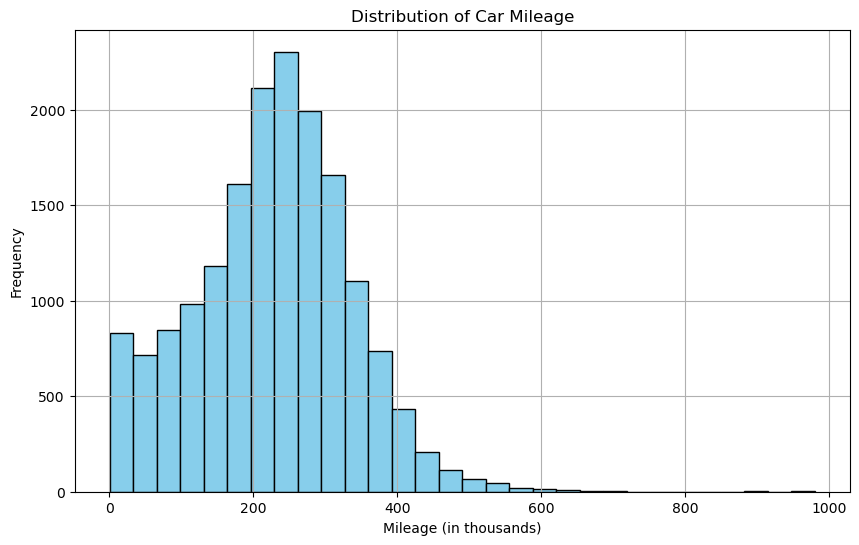

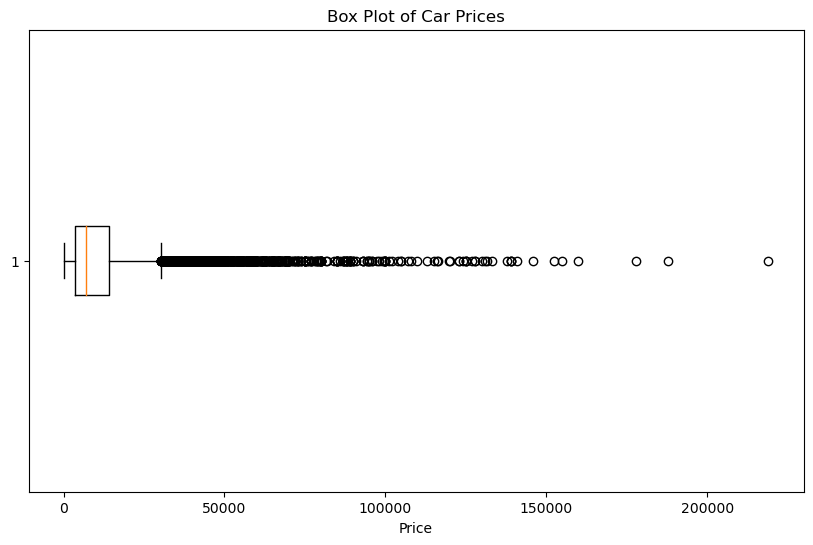

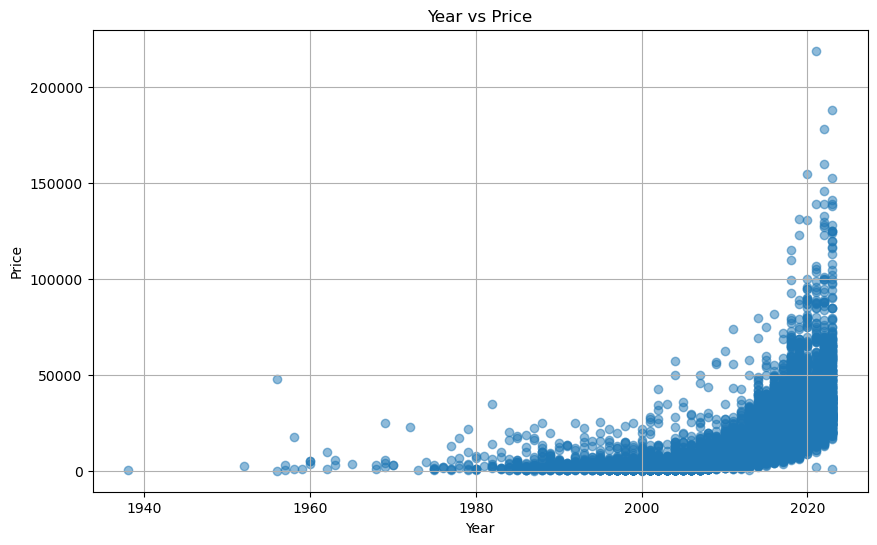

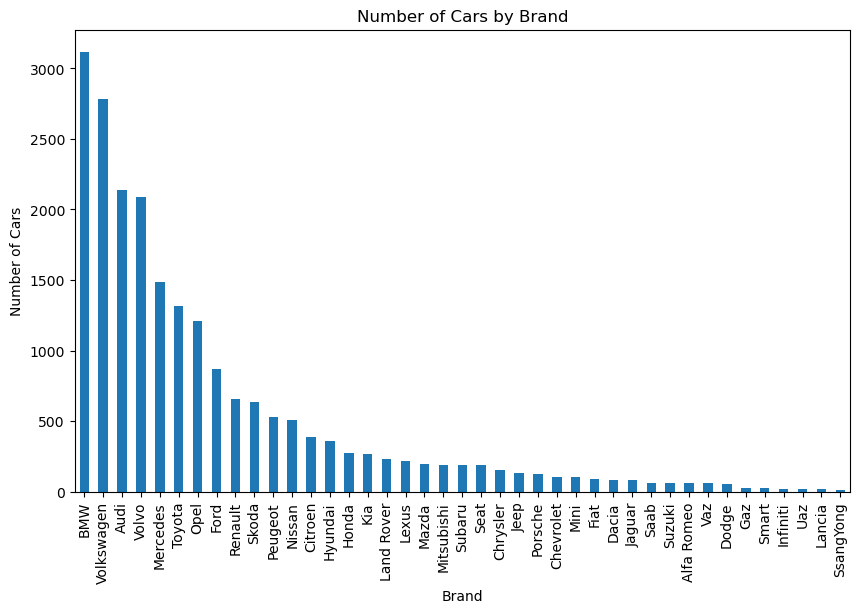

In [76]:
# Histogram for 'Mileage'
plt.figure(figsize=(10, 6))
plt.hist(df['mileage'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (in thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot for 'Price'
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'].dropna(), vert=False)
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

# Scatter Plot for 'Year' vs 'Price'
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Bar Chart for 'Brand'
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Number of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.show()

In [16]:
df_encoded = pd.get_dummies(df, columns=['brand', 'model', 'engine'])

In [17]:
df_encoded

,year,mileage,price,brand_Alfa Romeo,brand_Audi,brand_BMW,brand_Chevrolet,brand_Chrysler,brand_Citroen,brand_Dacia,...,engine_5.5,engine_5.6,engine_5.7,engine_5.7H,engine_6.0,engine_6.2,engine_6.2D,engine_6.4,engine_7.3D,engine_E
0,2019,88.0,24850,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020,91.0,34500,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2000,NaN,1800,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2010,343.0,1850,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2016,NaN,20990,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29372,1975,43.0,1450,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29373,1986,NaN,2500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29374,1979,3.3,3800,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29375,1975,68.0,650,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df_encoded.describe

<bound method NDFrame.describe of        year mileage  price  brand_Alfa Romeo  brand_Audi  brand_BMW  \
0      2019    88.0  24850              True       False      False   
3      2020    91.0  34500              True       False      False   
4      2000     NaN   1800              True       False      False   
5      2010   343.0   1850              True       False      False   
6      2016     NaN  20990              True       False      False   
...     ...     ...    ...               ...         ...        ...   
29372  1975    43.0   1450             False       False      False   
29373  1986     NaN   2500             False       False      False   
29374  1979     3.3   3800             False       False      False   
29375  1975    68.0    650             False       False      False   
29376  1982   104.0   3500             False       False      False   

       brand_Chevrolet  brand_Chrysler  brand_Citroen  brand_Dacia  ...  \
0                False           False

In [21]:
df_no_nans = df_encoded.dropna(subset=['mileage'])

In [80]:
imputer_mean = SimpleImputer(missing_values=np.nan)
imputer_knn = KNNImputer(n_neighbors=5)
imputer_median =  SimpleImputer(strategy='median', missing_values=np.nan)
imputer_most_freq =  SimpleImputer(strategy='most_frequent', missing_values=np.nan)

In [81]:
imputer_mean.fit(df_encoded)
imputer_knn.fit(df_encoded)
imputer_median.fit(df_encoded)
imputer_most_freq.fit(df_encoded)

SimpleImputer(strategy='most_frequent')

In [82]:
enc_arr_mean = imputer_mean.transform(df_encoded)
enc_arr_knn = imputer_knn.transform(df_encoded)
enc_arr_median = imputer_median.transform(df_encoded)
enc_arr_most_freq = imputer_most_freq.transform(df_encoded)


In [83]:
df_encoded_mean = pd.DataFrame(enc_arr_mean, columns=df_encoded.columns)
df_encoded_knn = pd.DataFrame(enc_arr_knn, columns=df_encoded.columns)
df_encoded_median = pd.DataFrame(enc_arr_median, columns=df_encoded.columns)
df_encoded_most_freq = pd.DataFrame(enc_arr_most_freq, columns=df_encoded.columns)

In [84]:
scaler_mean = StandardScaler()
scaler_knn = StandardScaler()
scaler_median = StandardScaler()
scaler_most_freq = StandardScaler()

num_cols = ["year", "mileage"]

df_num_mean = df_encoded_mean[num_cols]
df_num_knn = df_encoded_knn[num_cols]
df_num_median = df_encoded_median[num_cols]
df_num_most_freq = df_encoded_most_freq[num_cols]

scaler_mean.fit(df_num_mean)
scaler_knn.fit(df_num_knn)
scaler_median.fit(df_num_median)
scaler_most_freq.fit(df_num_most_freq)

joblib.dump(scaler_mean, 'scaler_mean.save')
joblib.dump(scaler_knn, 'scaler_knn.save')
joblib.dump(scaler_median, 'scaler_median.save')
joblib.dump(scaler_most_freq, 'scaler_most_freq.save')

df_mean_numerical_scaled = pd.DataFrame(scaler_mean.fit_transform(df_num_mean), columns=num_cols)
df_knn_numerical_scaled = pd.DataFrame(scaler_knn.fit_transform(df_num_knn), columns=num_cols)
df_median_numerical_scaled = pd.DataFrame(scaler_median.fit_transform(df_num_median), columns=num_cols)
df_most_freq_numerical_scaled = pd.DataFrame(scaler_most_freq.fit_transform(df_num_most_freq), columns=num_cols)

df_encoded_mean[num_cols] = df_mean_numerical_scaled
df_encoded_knn[num_cols] = df_knn_numerical_scaled
df_encoded_median[num_cols] = df_median_numerical_scaled
df_encoded_most_freq[num_cols] = df_most_freq_numerical_scaled

In [26]:
scaler_no_nans = StandardScaler()
df_num_nonans = df_no_nans[["year", "mileage"]]
scaler_no_nans.fit(df_num_nonans)
joblib.dump(scaler_no_nans, 'scaler_nonans.save')

['scaler_nonans.save']

In [88]:
df_encoded_mean.to_csv("data_cleaned_mean.csv", index = False)
df_encoded_knn.to_csv("data_cleaned_knn.csv", index = False)
df_encoded_median.to_csv("data_cleaned_median.csv", index = False)
df_encoded_most_freq.to_csv("data_cleaned_most_freq.csv", index = False)

In [28]:
df_no_nans.to_csv("data_cleaned_nonans.csv", index = False)